# 0 - Importando bibliotecas necessárias e carregando dataset

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

adult_census_df = pd.read_csv("adult.csv")

display(adult_census_df)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# 1 - Tratamento de dados

In [98]:
adult_census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Verificando valores vazios

In [99]:
adult_census_df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


## Verificando colunas com "?"

In [100]:
columns_with_question_mark = adult_census_df.columns[adult_census_df.isin(['?']).any()].tolist()
columns_with_question_mark

['workclass', 'occupation', 'native.country']

## Tratando colunas com valores "?"

In [101]:
filled_adult_census_df = adult_census_df.copy()

for column in filled_adult_census_df[columns_with_question_mark]:
    mode = filled_adult_census_df[column].mode()[0]
    filled_adult_census_df[column] = filled_adult_census_df[column].replace('?', mode)

In [102]:
filled_adult_census_df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,>50K


## Verificando outliers

In [103]:
filled_adult_census_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Filtrando apenas as colunas numéricas

In [104]:
numerical_columns = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

### Analisando os outliers das colunas numéricas

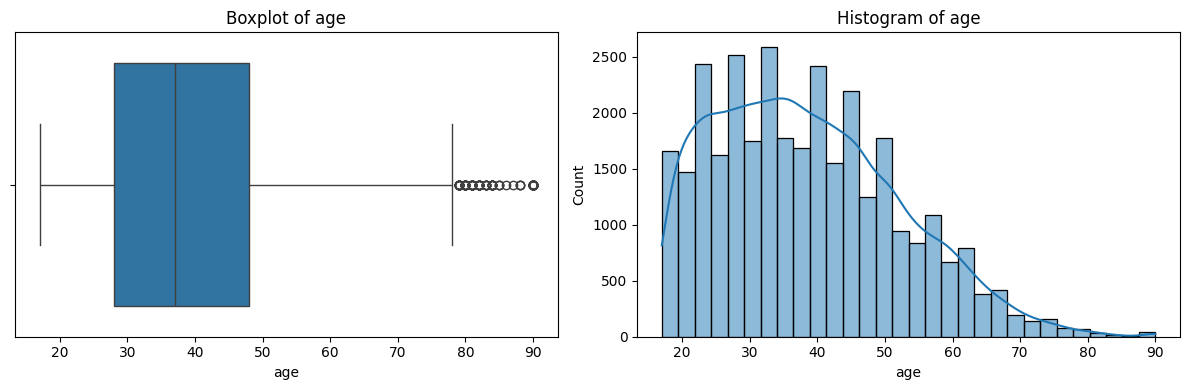

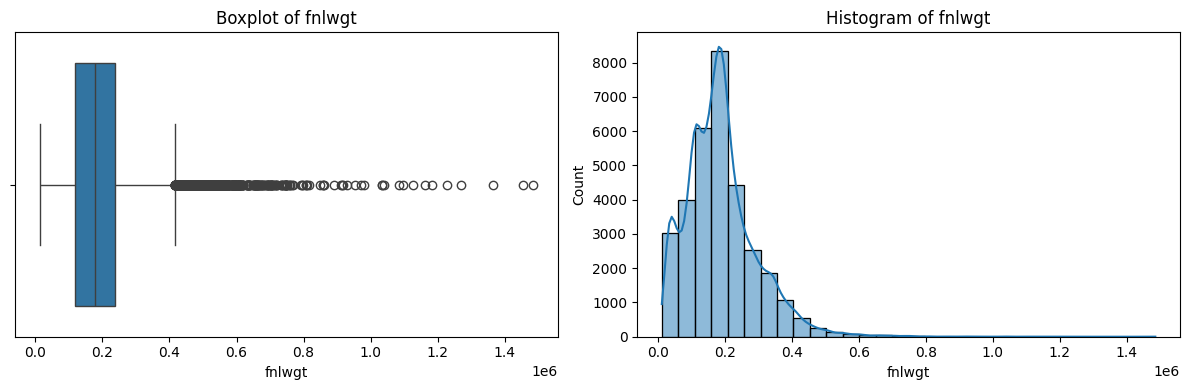

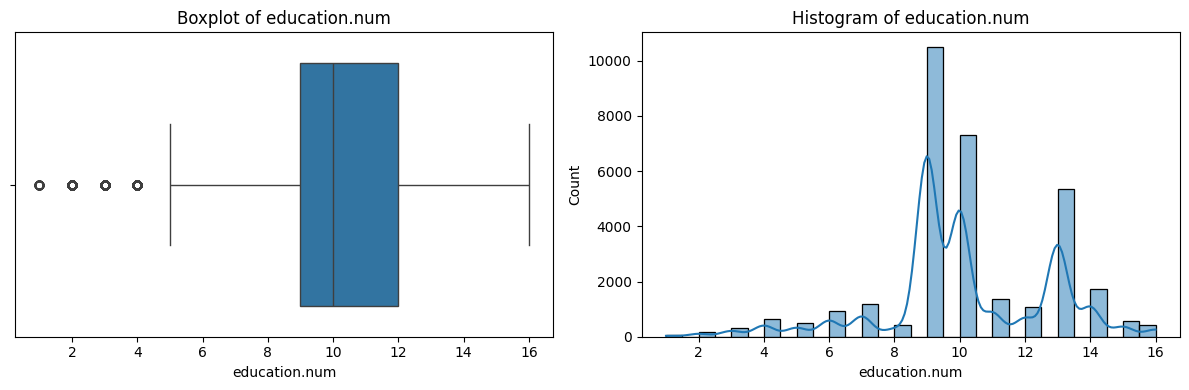

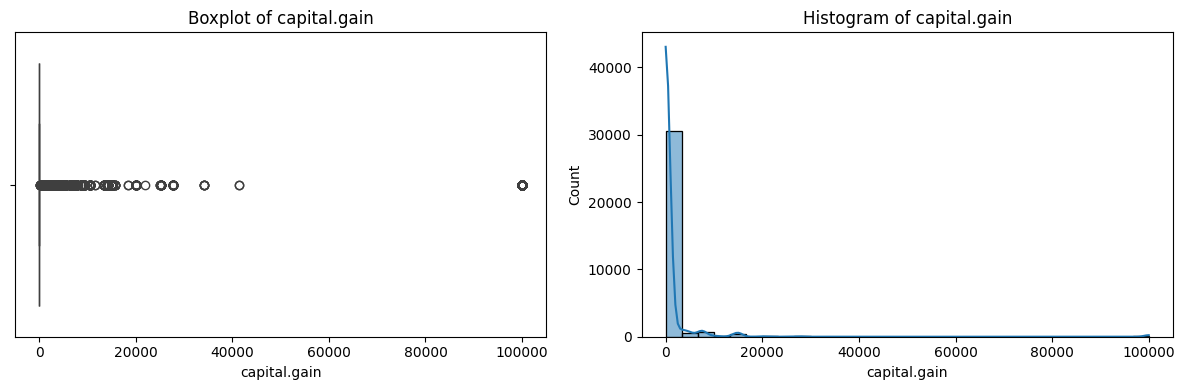

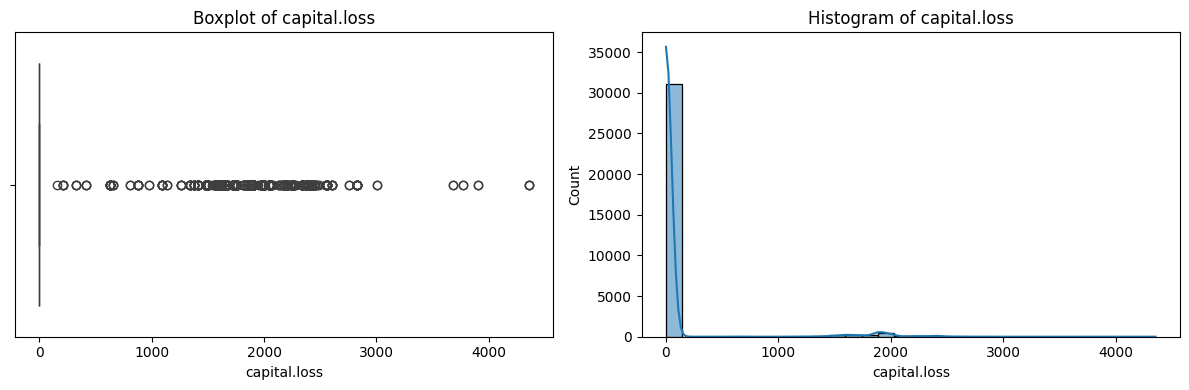

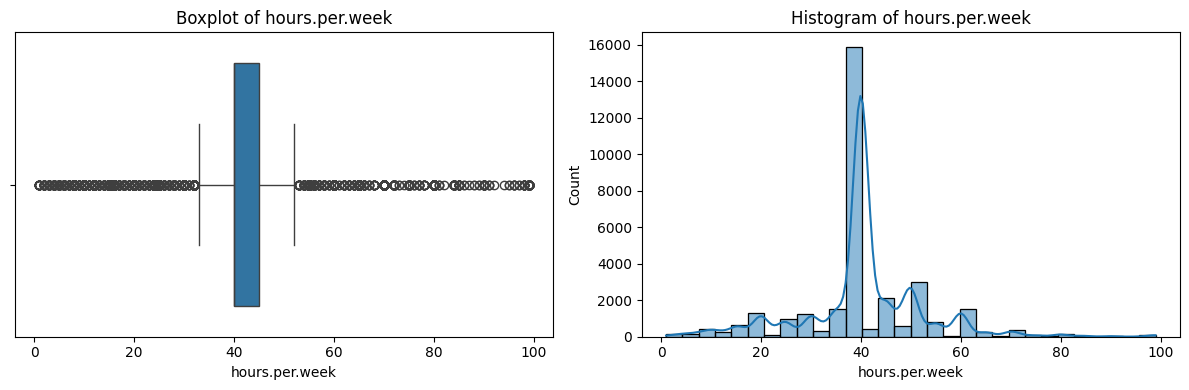

In [105]:
for col in filled_adult_census_df[numerical_columns]:
    plt.figure(figsize=(12, 4))  # Wider figure for side-by-side plots

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=filled_adult_census_df[col])
    plt.title(f'Boxplot of {col}')

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(filled_adult_census_df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')

    plt.tight_layout()
    plt.show()

Após analisar os dados, acredito que seria prejudicial fazer o tratamento dos outliers, visto que a maioria deles está em intervalos que possuem significado e que representam o que cada informação quer representar, como por exemplo, os dados de horas trabalhadas por semana está representada em um intervalo razoável de 0 a 100 horas. Dito isso, seguirei sem o tratamento dos outliers

## Alteração da coluna income

A seguir, farei uma alteração da coluna income para valores numéricos: 0 para quem ganha <= 50K e 1 para quem ganha > 50K.

In [106]:
filled_adult_census_df['income'] = filled_adult_census_df['income'].replace({'<=50K': 0, '>50K': 1})

<ipython-input-106-bd8c48473bd5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filled_adult_census_df['income'] = filled_adult_census_df['income'].replace({'<=50K': 0, '>50K': 1})


# 2 - Treinamento dos modelos

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [108]:
X = filled_adult_census_df.drop('income', axis=1)
X_encoded = pd.get_dummies(X, drop_first=True) # Usando One-Hot Encoding para as variáveis categóricas

y = filled_adult_census_df['income']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

## Decision Tree

In [110]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4976
           1       0.61      0.61      0.61      1537

    accuracy                           0.82      6513
   macro avg       0.74      0.74      0.74      6513
weighted avg       0.82      0.82      0.82      6513



## Random Forest

In [111]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4976
           1       0.72      0.61      0.66      1537

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.85      0.85      0.85      6513



# 3 - Conclusão

Podemos perceber pelos resultados que, tanto a Decision Tree quanto a Random Forest performaram muito melhor na previsão de pessoas que ganham <=50K do que as que ganham >50K. Isso pode estar associado ao fato do dataset utilizado ter mais pessoas no primeiro grupo e, portanto, o modelo conseguiu generalizar melhor esse público.